In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 655.4 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\gayat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:

# Display basic information about the dataset
print(train_df.info())
print(train_df['class_index'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100693 entries, 0 to 100692
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   class_index  100693 non-null  int64 
 1   review_text  100693 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
None
class_index
2    0.553862
3    0.196041
1    0.165304
4    0.048087
0    0.036706
Name: proportion, dtype: float64


In [4]:

# Prepare the data
X_train = train_df['review_text']
y_train = train_df['class_index']


In [5]:
# Create TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Include both unigrams and bigrams
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # Only words with 2 or more letters
    stop_words=None  # Don't use pre-defined stopwords
)


In [6]:

X_train_tfidf = tfidf.fit_transform(X_train)


In [7]:


# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)


In [8]:
# Train the model with optimized parameters
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Reduced from 100
    max_depth=10,  # Limit tree depth
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',  # Use sqrt(n_features) features for each split
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Train the model
rf_classifier.fit(X_train_split, y_train_split)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [9]:

# Make predictions on validation set
y_pred = rf_classifier.predict(X_val)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       760
           1       0.00      0.00      0.00      3287
           2       0.55      1.00      0.71     11129
           3       0.00      0.00      0.00      3982
           4       0.00      0.00      0.00       981

    accuracy                           0.55     20139
   macro avg       0.11      0.20      0.14     20139
weighted avg       0.31      0.55      0.39     20139



C:\Users\gayat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gayat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gayat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

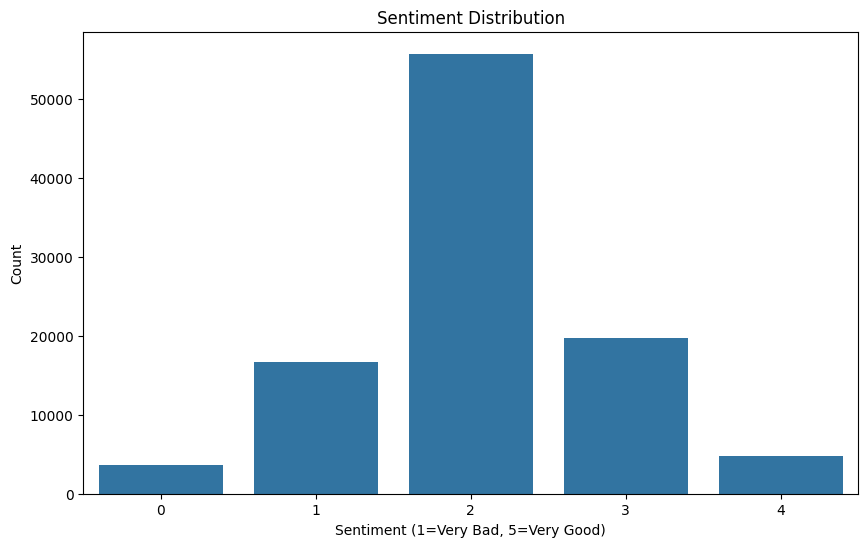

In [10]:

# Visualizations

# 1. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='class_index', data=train_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (1=Very Bad, 5=Very Good)')
plt.ylabel('Count')
plt.show('sentiment_distribution.png')
plt.close()


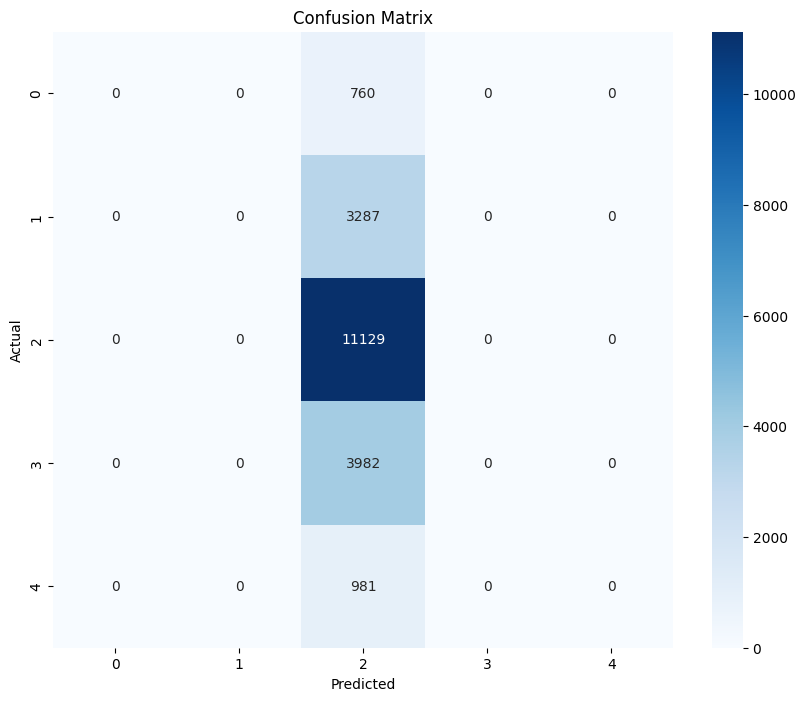

In [11]:

# 2. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show('confusion_matrix.png')
plt.close()


ValueError: We need at least 1 word to plot a word cloud, got 0.

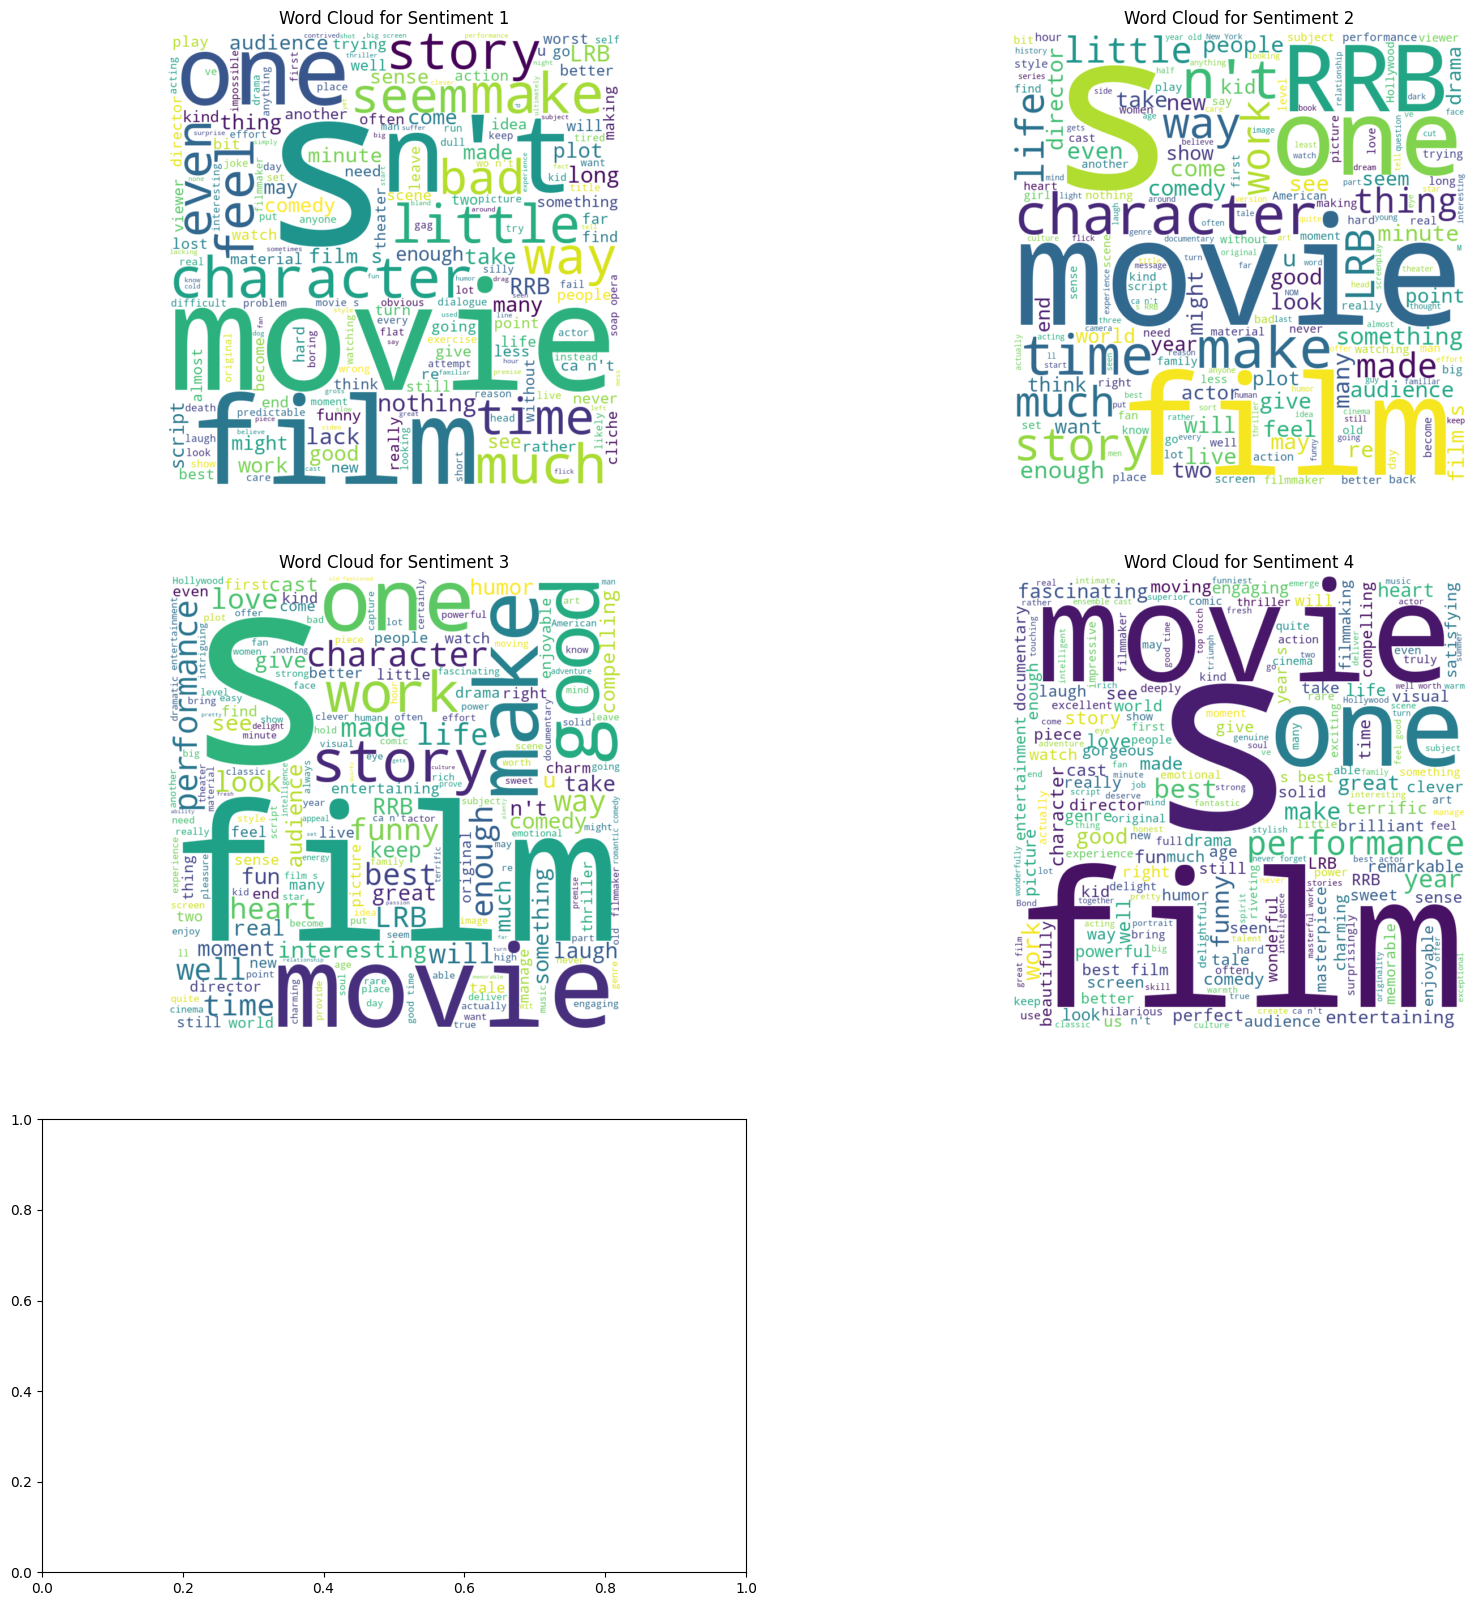

In [12]:

# 3. Word Clouds for each sentiment
plt.figure(figsize=(20, 20))
for i in range(1, 6):
    plt.subplot(3, 2, i)
    text = ' '.join(train_df[train_df['class_index'] == i]['review_text'])
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentiment {i}')
    plt.axis('off')
plt.tight_layout()
plt.show('sentiment_wordclouds.png')
plt.close()


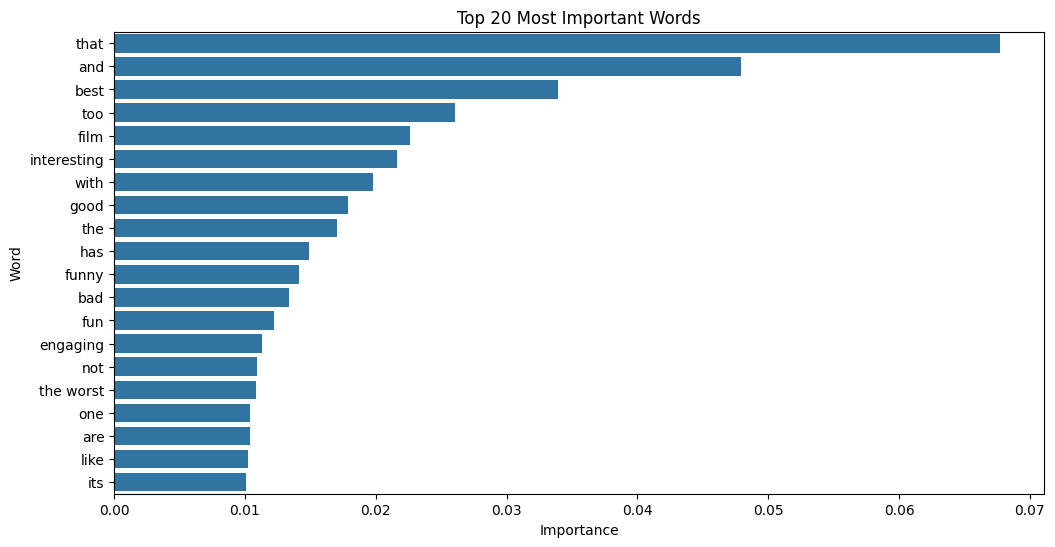

In [13]:

# 4. Feature Importance
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Words')
plt.xlabel('Importance')
plt.ylabel('Word')
plt.show('feature_importance.png')
plt.close()


In [14]:

# Predictions on test set
X_test = test_df['review_text']
X_test_tfidf = tfidf.transform(X_test)
test_predictions = rf_classifier.predict(X_test_tfidf)

# Add predictions to test dataframe
test_df['predicted_sentiment'] = test_predictions

# Save predictions
test_df.to_csv('test_predictions.csv', index=False)

print("\nAnalysis complete. Visualizations and predictions have been saved.")

# Additional Analysis



Analysis complete. Visualizations and predictions have been saved.


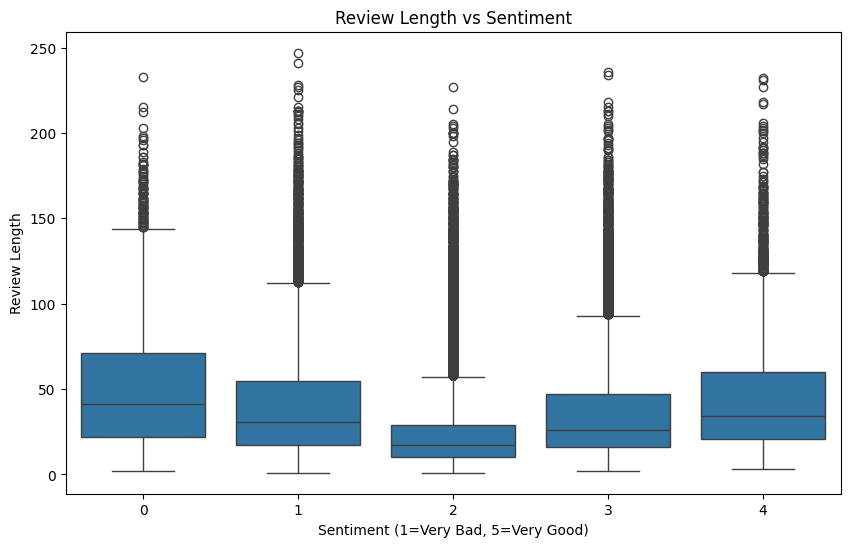

In [15]:

# 5. Review Length vs Sentiment
train_df['review_length'] = train_df['review_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='class_index', y='review_length', data=train_df)
plt.title('Review Length vs Sentiment')
plt.xlabel('Sentiment (1=Very Bad, 5=Very Good)')
plt.ylabel('Review Length')
plt.show('review_length_vs_sentiment.png')
plt.close()


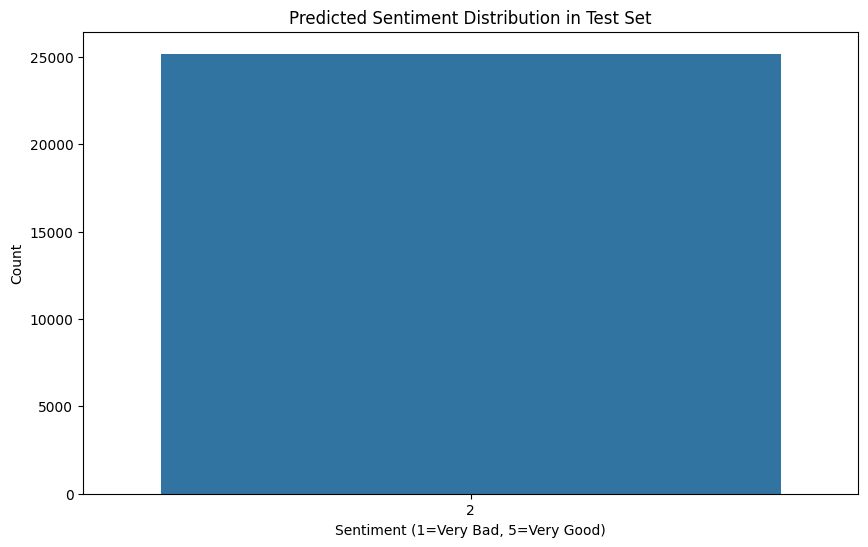


Additional visualizations have been saved.


In [31]:

# 6. Sentiment Distribution in Test Set
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_sentiment', data=test_df)
plt.title('Predicted Sentiment Distribution in Test Set')
plt.xlabel('Sentiment (1=Very Bad, 5=Very Good)')
plt.ylabel('Count')
plt.show('test_sentiment_distribution.png')
plt.close()

print("\nAdditional visualizations have been saved.")